In [1]:
# Import library yang diperlukan
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import PIL
from IPython.display import HTML
from matplotlib.animation import ArtistAnimation
from matplotlib import animation, rc
from metpy.units import units
import time

%matplotlib inline

In [2]:
#Buka dataset tpw

db = xr.open_dataset('totrainwater.nc')
db.coords
lats = db.latitude.data
lons = db.longitude.data

In [3]:
# Membuka dataset angin
da = xr.open_dataset('hor_wind.nc')

# Mengambil koordinat dan nilai variabel angin
da.coords
latse = da.latitude.data
lonse = da.longitude.data

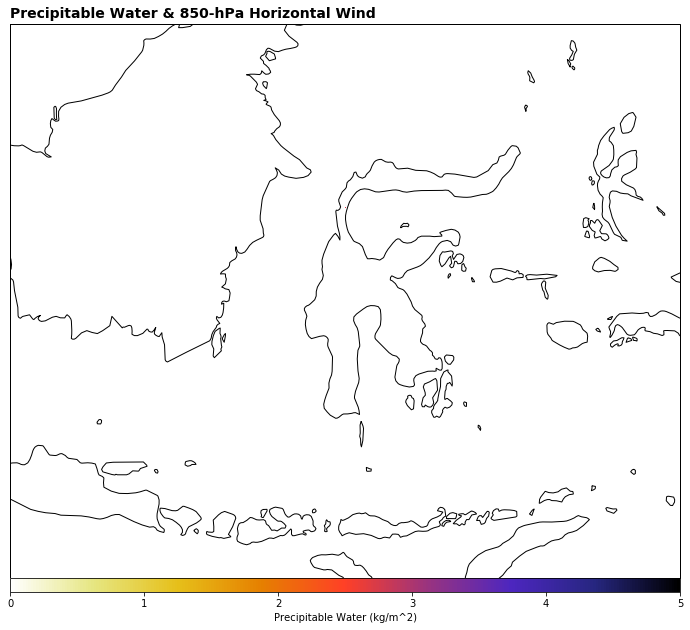

In [4]:
# Membuat plot dasar background

gradient = np.linspace(0, 5, 10)
gradient = np.vstack((gradient, gradient))

mapcrs = ccrs.Mercator(central_longitude=120,
                        min_latitude=-10,
                        max_latitude=5)
datacrs = ccrs.PlateCarree()
fig = plt.figure(1, figsize=(12, 12))
ax = plt.subplot(111, projection=mapcrs)
ax.set_extent([110, 130, 5, -10], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
cf = ax.imshow(gradient, aspect='auto', cmap=plt.cm.CMRmap_r)
plt.title('Precipitable Water & 850-hPa Horizontal Wind', weight='semibold', fontsize=14, loc='left')
cb = plt.colorbar(cf, ax= ax, orientation='horizontal', pad=0, aspect=50)
cb.set_label('Precipitable Water (kg/m^2)')


#Membuat plot animasi isi
def animate (i):
    vara = db['tcrw'].isel(time=i)
    varv = vara.values
    uwnd = da['u'].isel(time=i)
    uwnd.metpy.convert_units('kt')
    uwnd = uwnd.values
    vwnd = da['v'].isel(time=i)
    vwnd.metpy.convert_units('kt')
    vwnd = vwnd.values
    vtime = db.time.data[i].astype('datetime64[ms]').astype('O')
    ax.contourf(lons, lats, varv, cmap=plt.cm.CMRmap_r, transform=datacrs)
    ax.barbs(lonse, latse, uwnd, vwnd, pivot='middle', color='black', regrid_shape=20, transform=datacrs)
    ax.set_title('{}'.format(vtime), weight='semibold', loc='right')
    time.sleep(1)

In [5]:
#Menampilkan dan menyimpan animasi

ani = animation.FuncAnimation(fig, animate, 20, interval=1000, blit=False)
FFwriter = animation.FFMpegWriter()
#ani.save('win_tpw.mp4', fps=1.0)
HTML(ani.to_html5_video())